In [56]:
! pip install opencv-python 
# terminal (가상환경 아직 안됨)


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import cv2
print(cv2.__version__)

4.10.0


In [58]:
! pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

print(cv2.__version__)

4.10.0


In [60]:
! pip instal ipykernel

ERROR: unknown command "instal" - maybe you meant "install"



In [61]:
img = cv2.imread("./dog.bmp")
print("img type =", type(img)) # numpy.ndarray(행렬임)
print("img shape =", img.shape) # 행렬은 row를 먼저 계산, 3은 BGV(OpenCV에서는 RGB가 아니라, BGV로 열림)
print("img dtype =", img.dtype) # uint8 => unsigned int (2의 8bit)

cv2.imshow("dog", img)
cv2.waitKey()
cv2.destroyAllWindows() # 키를 받아서 창을 닫아라 

img type = <class 'numpy.ndarray'>
img shape = (480, 640, 3)
img dtype = uint8


In [62]:
! pip install torchsummary 
# cmd


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
! pip install torch


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
! pip install torchvision


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
! pip install --upgrade torch torchvision torchaudio



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import torch
from torchvision.io import read_image
from torchvision import models, transforms, datasets
from torchsummary import summary 

In [67]:
! pip install requests


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import os
import torch
from torchvision.io import read_image
from torchvision import models, transforms, datasets
from torchsummary import summary
import cv2
import matplotlib.pyplot as plt	
import numpy as np
import requests

In [69]:
## device setting
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device = ", device)

## weights import
weights = models.GoogLeNet_Weights.IMAGENET1K_V1
googlenet = models.googlenet(weights = weights) 

print("model summary = ")
googlenet.eval() # eval()을 안하면 다시 세팅하겠다는 것
summary(googlenet, (3, 224, 224), device = str(device)) # depth, image size(학습할 때) 


device =  cpu
model summary = 
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
       BasicConv2d-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
       BasicConv2d-7           [-1, 64, 56, 56]               0
            Conv2d-8          [-1, 192, 56, 56]         110,592
       BatchNorm2d-9          [-1, 192, 56, 56]             384
      BasicConv2d-10          [-1, 192, 56, 56]               0
        MaxPool2d-11          [-1, 192, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          12,288
      BatchNorm2d-13           [-1, 64, 28, 28]             128
      Ba

In [70]:
filename = "./dog.bmp"
img_bmp = cv2.imread(filename)
print(type(img_bmp))
print("img_bmp =", img_bmp.shape)

cv2.imwrite("dog.png", img_bmp) # bmp => png 변환?

<class 'numpy.ndarray'>
img_bmp = (480, 640, 3)


True

In [71]:
## 
filename = "./dog.png"
img = read_image(filename) # 이 이미지가 cpu에 있게 됨 => gpu 
img = img.to(device)

print(type(img))
print(img.shape)

<class 'torch.Tensor'>
torch.Size([3, 480, 640])


In [72]:
##
# weights = models.GoogLeNet_Weights.IMAGENET1K_V1
preprocess = weights.transforms()
print(preprocess)

# 이미지는 중간에 이미지가 적당히 들어가있어야 한다. 
# 영상의 평균, interpolation? => 파라미터 (라이브러리가 한 방에 해줌)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.535425].


torch.Size([1, 3, 224, 224])
processed image shape =  torch.Size([3, 224, 224])


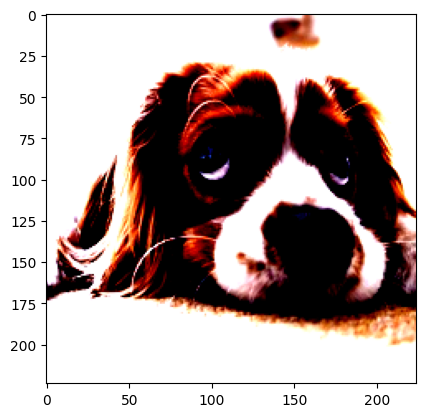

In [73]:
batch = preprocess(img).unsqueeze(0) # 이미지는 변하지 않았지만, 이렇게 해야 비로소 GoogleLeNet에 들어갈 준비가 끝남
print(batch.shape)

# 원본이 변경된 게 아니라, 전처리된 이미지 생성 
# 원본 이미지의 크기가 GoogleNet에서 요구하는 입력 크기와 다르다면, 이미지의 크기를 적절히 맞추기 위해 보간법을 사용하여 이미지의 픽셀 값을 조정

## display => 아래 코딩은 안해도 결과에 영향을 미치지 않음
processed = batch[0, :, :, :] # dimension이 4개이면 tensor 형식 
print("processed image shape = ", processed.shape)
plt_image = processed.permute(1, 2, 0) 

plt.imshow(plt_image.cpu().numpy())
plt.show()

In [74]:
# ## result 보기 
# prediction = googlenet(batch)
# # print(prediction)

# print(prediction.shape)
# # 1000개의 class (어떤 클래스에 속해있는지 보여주는 output)

In [75]:
## predicting score

prediction = googlenet(batch).softmax(1)
# prediction.max(1)

class_id = prediction.argmax(1).item()
class_id 
# 784에 있는 게 제일 높구나를 알 수 있음

score = prediction[0, class_id].item()
print("score = {:.3f}%".format(score*100))

score = 79.207%


In [76]:
## category 
category_name = weights.meta["categories"][class_id]
print("category name =", category_name)

category name = Blenheim spaniel


classification은 bounding box가 없는 알고리즘 

In [77]:
## display image

# print("score = {:.3f}%".format(score*100))
# print("category name =", category_name)

text = "score = {0:.3f}%, category = {1}".format(score * 100, category_name)
print(text)
# Blenheim spaniel일 확률이 약 80%

score = 79.207%, category = Blenheim spaniel


In [81]:
## Image Classification
src = cv2.imread(filename)

cv2.putText(src, text, (10, 30), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 255, 0), 1, cv2.LINE_AA) # 10 pixel / color BGR type (type은 모델에 따라 다 다름) 

cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

# shape = row * column? 
# cv2 = column * row?

## Image classification

In [100]:
## continuous display

## file listing
import os 

file_path = "./image_dw/"
img_list = os.listdir(file_path)

img_files = [] # 빈 리스트 생성

for i in img_list:
    img_dir = file_path + i
    img_files.append(img_dir)

display(img_files) # print(img_list)

## googlenet isntance (객체 만들기)
weights = models.GoogLeNet_Weights.IMAGENET1K_V1
googlenet = models.googlenet(weights = weights).to(device) 

googlenet.eval() # 반드시 호출, 안그러면 모델을 학습하려고 초기화한다. 그래서 이상한 값이 나올 수 밖에 없다. 

## image preprocessing
preprocess = weights.transforms()

# 여기까지 준비완료 
# for loop 안쪽에서 preprocessing 해줘야 한다. 이미지가 여러 개라 하나씩 할 수 없다. while 문 안에서 각각의 이미지를 돌아야한다. 

idx = 0 # while loop는 index 없으니까 정해주기 

while True:
    img = read_image(img_files[idx]) # read_image() 많은 스텝을 줄임 => 이미지가 tensor로 들어오는 데다가 
    img = img.to(device)
    batch = preprocess(img).unsqueeze(0) # 한 장씩 display? 
    
    prediction = googlenet(batch).softmax(1)
    class_id = prediction.argmax().item()
    score = prediction[0, class_id].item()
    category_name = weights.meta["categories"][class_id]
    text1 = "Score = {0:.3f}%".format(score*100)
    text2 = "Category = {0}".format(category_name)


    src = cv2.imread(img_files[idx])
    cv2.putText(src, text1, (20, 20), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
    cv2.putText(src, text2, (20, 40), cv2.FONT_HERSHEY_COMPLEX, 0.7, (0, 0, 255), 1, cv2.LINE_AA)
    cv2.imshow("Image", src)

    if cv2.waitKey(3000) == 27:
        break

    idx += 1
        
    if idx >= len(img_files):
        idx = 0  # 처음부터 다시 돌아라
    


['./image_dw/bread.png',
 './image_dw/car.png',
 './image_dw/chocolate.png',
 './image_dw/hat.png',
 './image_dw/water.png']

RuntimeError: output with shape [1, 224, 224] doesn't match the broadcast shape [3, 224, 224]

: 

### Googlenet

In [5]:
## Pretrained model list
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [7]:
# Step 1: Initialize model with the best available weights
# GoogLeNet (Inception v1) model architecture from Going Deeper with Convolutions.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

weights = models.GoogLeNet_Weights.IMAGENET1K_V1
googlenet = models.googlenet(weights=weights).to(device) # model은 그냥 가져오면 cpu에 있어서 gpu로 보내줘야함 => .to(device)
googlenet.to(device)

googlenet.eval()
print("model smmary =")
summary(googlenet, (3, 224, 224), device=str(device))

# torch의 경우, cpu / gpu를 우리가 지정해주어야 한다.

model eval = 
model smmary =
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
       BasicConv2d-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
       BasicConv2d-7           [-1, 64, 56, 56]               0
            Conv2d-8          [-1, 192, 56, 56]         110,592
       BatchNorm2d-9          [-1, 192, 56, 56]             384
      BasicConv2d-10          [-1, 192, 56, 56]               0
        MaxPool2d-11          [-1, 192, 28, 28]               0
           Conv2d-12           [-1, 64, 28, 28]          12,288
      BatchNorm2d-13           [-1, 64, 28, 28]             128
      Basi

In [23]:
# Step 2: Read image
## read torchvision io
## rgb format, <class 'torch.Tensor'>, torch.Size([3, 1213, 1546]) 
# filename = "./fig/classification/dog.jpg"
filename = "./fig/classification/beagle.jpg"

img = read_image(filename) # rgb format
img = img.to(device)
print(type(img)) # <class 'torch.Tensor'>
print(img.shape) # torch.Size([3, 1213, 1546]) 

<class 'torch.Tensor'>
torch.Size([3, 366, 640])


In [24]:
# Step 3: Initialize the inference transforms
# preprocess
# ImageClassification(
#     crop_size=[224]
#     resize_size=[256]
#     mean=[0.485, 0.456, 0.406]
#     std=[0.229, 0.224, 0.225]
#     interpolation=InterpolationMode.BILINEAR
# )

preprocess = weights.transforms()
print(preprocess)

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0665298..2.3611333].


torch.Size([1, 3, 224, 224])


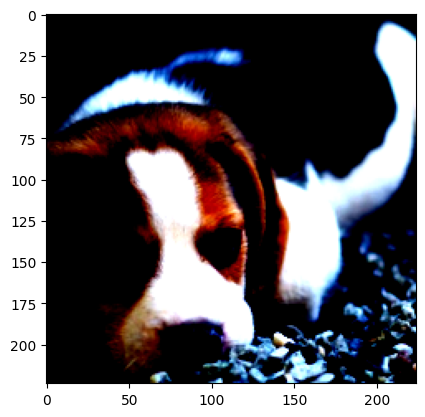

In [36]:
batch = preprocess(img).unsqueeze(0)
print(batch.shape)

##
processed_img = batch.data[0, :, :, :]
plt_img = processed_img.permute(1, 2, 0)

# plt_img.shape
plt.imshow(plt_img.cpu().numpy())
plt.show()

In [50]:
# Step 5: Use the model and print the predicted category
prediction = googlenet(batch).softmax(1)
# prediction.shape
# googlenet(batch)
# prediction[0]
class_id = prediction.argmax().item()
score = prediction[0, class_id].item()
print("score = {:.3f}%".format(score*100))

score = 89.275%


In [29]:
## categories
weights.meta["categories"]
# len(weights.meta["categories"])

['tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen',
 'ostrich',
 'brambling',
 'goldfinch',
 'house finch',
 'junco',
 'indigo bunting',
 'robin',
 'bulbul',
 'jay',
 'magpie',
 'chickadee',
 'water ouzel',
 'kite',
 'bald eagle',
 'vulture',
 'great grey owl',
 'European fire salamander',
 'common newt',
 'eft',
 'spotted salamander',
 'axolotl',
 'bullfrog',
 'tree frog',
 'tailed frog',
 'loggerhead',
 'leatherback turtle',
 'mud turtle',
 'terrapin',
 'box turtle',
 'banded gecko',
 'common iguana',
 'American chameleon',
 'whiptail',
 'agama',
 'frilled lizard',
 'alligator lizard',
 'Gila monster',
 'green lizard',
 'African chameleon',
 'Komodo dragon',
 'African crocodile',
 'American alligator',
 'triceratops',
 'thunder snake',
 'ringneck snake',
 'hognose snake',
 'green snake',
 'king snake',
 'garter snake',
 'water snake',
 'vine snake',
 'night snake',
 'boa constrictor',
 'rock python',
 'Indian cobr

In [53]:
category_name = weights.meta["categories"][class_id]
score_text = f"{category_name}: {100 * score:.1f}%"
# print(score_text)

src = cv2.imread(filename)
cv2.putText(src, score_text, (20, 30), cv2.FONT_HERSHEY_COMPLEX, 1,
            (0, 0, 255), 1, cv2.LINE_AA)

cv2.imshow("src", src)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
## Continuous display images in folder

fpath = "./fig/classification"
img_list = os.listdir(fpath)

img_files = []
for i in img_list:
    img_dir = "./fig/classification/" + i
    img_files.append(img_dir)

## googlenet load
weights = models.GoogLeNet_Weights.IMAGENET1K_V1
googlenet = models.googlenet(weights=weights)
googlenet.to(device)
googlenet.eval()

preprocess = weights.transforms()

idx = 0
while True:
    img = read_image(img_files[idx]) # rgb format
    img = img.to(device)
    batch = preprocess(img).unsqueeze(0)

    prediction = googlenet(batch).softmax(1)
    class_id = prediction.argmax().item()
    score = prediction[0, class_id].item()
    # print("score = {:.3f}%".format(score*100))
    category_name = weights.meta["categories"][class_id]
    score_text = f"{category_name}: {100 * score:.1f}%"
    # print(score_text)

    src = cv2.imread(img_files[idx])
    cv2.putText(src, score_text, (20, 30), cv2.FONT_HERSHEY_COMPLEX, 1,
                (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow("src", src)
    if cv2.waitKey(3000) == 27:
        break

    idx += 1

    if idx >= len(img_files):
        idx = 0

cv2.destroyAllWindows()

## Object detection
 

### Faster R-CNN
- https://github.com/csm-kr/torchvision_fasterrcnn_tutorial/blob/master/demo.py

In [13]:
import cv2
import torchvision
import numpy as np
from PIL import Image
from torchvision import transforms, models

print(cv2.__version__)

4.10.0


In [1]:
! pip install selectivesearch

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------------- ------------- 41.0/60.8 kB 2.0 MB/s eta 0:00:01
     ---------------------------------------- 60.8/60.8 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.9 MB 15.2 MB/s eta 0:00:01
   --- ------------------------------------ 1.2/12.9 MB 15.9 MB/s eta 0:00:01
   ------ --------------------------------- 2.0/12.9 MB 15.7 MB/s eta 0:00:01
   ------- -------------------------------- 2.4/12.9 MB 12.9 MB/s eta 0:00:01
   -------- ------------------------------- 2.9/12.9 MB 


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


여기부터 다시 코드 작성

In [1]:
import selectivesearch

In [3]:
import os
import torch
from torchvision.io import read_image
from torchvision import models, transforms, datasets
from torchsummary import summary
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

In [4]:
img = cv2.imread("dog.png")

cv2.imshow("img", img)
cv2.waitKey()
cv2.destroyAllWindows()

In [5]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

proposal, regions = selectivesearch.selective_search(img_rgb, 
                                                     scale = 200,
                                                     sigma = 0.8, 
                                                     min_size = 2000) 
# min_size 50 픽셀 미만은 합치지 않기                           

c:\Users\carly\AppData\Local\Programs\Python\Python312\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


In [6]:
display(regions)

[{'rect': (0, 0, 366, 244), 'size': 49847, 'labels': [np.float64(0.0)]},
 {'rect': (273, 0, 249, 212), 'size': 15048, 'labels': [np.float64(1.0)]},
 {'rect': (426, 0, 213, 257), 'size': 37702, 'labels': [np.float64(2.0)]},
 {'rect': (0, 66, 317, 274), 'size': 29506, 'labels': [np.float64(3.0)]},
 {'rect': (273, 95, 192, 254), 'size': 10899, 'labels': [np.float64(4.0)]},
 {'rect': (265, 98, 115, 162), 'size': 11228, 'labels': [np.float64(5.0)]},
 {'rect': (387, 105, 84, 149), 'size': 6717, 'labels': [np.float64(6.0)]},
 {'rect': (439, 112, 65, 91), 'size': 2700, 'labels': [np.float64(7.0)]},
 {'rect': (252, 128, 76, 92), 'size': 2233, 'labels': [np.float64(8.0)]},
 {'rect': (206, 169, 102, 157), 'size': 8064, 'labels': [np.float64(9.0)]},
 {'rect': (139, 171, 77, 174), 'size': 7224, 'labels': [np.float64(10.0)]},
 {'rect': (460, 182, 69, 109), 'size': 4452, 'labels': [np.float64(11.0)]},
 {'rect': (499, 195, 140, 134), 'size': 5642, 'labels': [np.float64(12.0)]},
 {'rect': (356, 245, 98

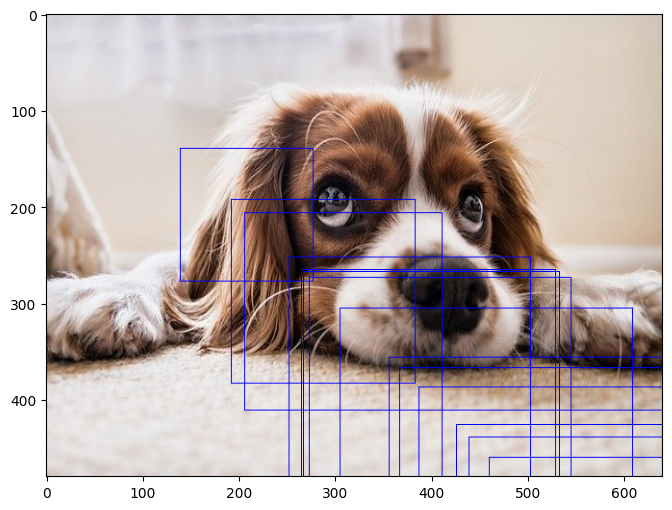

In [8]:
import matplotlib.pyplot as plt

img_rgb_copy = img_rgb.copy()

for i in regions:
    x = i["rect"][0] # x y width height
    y = i["rect"][0]
    w = i["rect"][0]
    h = i["rect"][0]

    cv2.rectangle(img_rgb_copy, (x, y, w, h), (0, 0, 255), 1)  

# bounding box 그리기
plt.figure(figsize = (12, 6))
plt.imshow(img_rgb_copy)
plt.show()

x, y, w, h =  (0, 66, 317, 274)


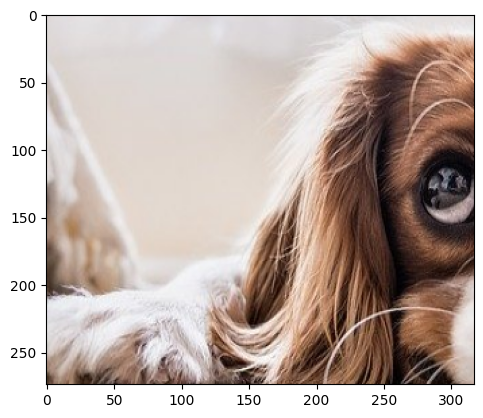

In [9]:
(x, y, w, h) = regions[3]["rect"]
print("x, y, w, h = ", (x, y, w, h))

selected_region = img_rgb[y:y+h, x:x+w]
plt.imshow(selected_region)
plt.show()

In [17]:
## Faster RCNN function
def demo(img_path, threshold):
# img_path = "./image_dw/bread.png"
	img = read_image(img_path)

	# print("image type = ", type(img))
	# print("iamge shpae = ", img.shape)

	## fast RCNN weights
	weights = models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
	# print("weights = ", weights) # COCO dataset으로 학습

	## model (weight file)
	model = models.detection.fasterrcnn_resnet50_fpn(weights = weights)

	preprocess = weights.transforms()
	batch_img = preprocess(img).unsqueeze(0)

	model.eval()
	pred = model(batch_img)[0] # bounding box + prediction 나옴 


In [14]:
# data preprocessing
preprocess = weights.transforms()
print("preprocess = \n", preprocess)

# batch_img = preprocess(img) # ResNet이 학습했던 그대로 (안그러면 어떻게 학습했는지 노가다로 변경해줘야 함)
batch_img = preprocess(img).unsqueeze(0)
print(batch_img.shape)


preprocess = 
 ObjectDetection()
torch.Size([1, 3, 1000, 1500])


In [16]:
## evaluation
model.eval()
pred = model(batch_img)[0] # bounding box + prediction 나옴 

print(pred)

{'boxes': tensor([[2.3663e+01, 2.2059e+01, 1.4987e+03, 1.0000e+03],
        [3.7724e+02, 3.9935e+02, 1.0303e+03, 8.4797e+02],
        [8.9099e+02, 1.6721e+02, 1.3388e+03, 5.0473e+02],
        [6.1199e-01, 1.8002e+01, 6.5858e+02, 6.4268e+02],
        [4.8405e+02, 6.2612e+02, 1.1002e+03, 8.5537e+02],
        [5.1870e+00, 0.0000e+00, 6.8167e+02, 6.1067e+02],
        [1.9982e+01, 5.9873e+02, 1.1192e+03, 1.0000e+03],
        [6.5168e+02, 4.2141e+02, 1.4958e+03, 9.9692e+02],
        [4.9046e+02, 6.2489e+02, 1.0959e+03, 8.5549e+02],
        [8.1960e+02, 4.4461e+02, 1.4879e+03, 7.9924e+02],
        [8.9853e+02, 1.6909e+02, 1.3342e+03, 5.0748e+02],
        [3.7383e+02, 4.1111e+02, 9.6520e+02, 7.6507e+02],
        [3.8008e+02, 1.2352e+02, 1.5000e+03, 7.0808e+02],
        [1.7114e+01, 5.2120e+02, 6.3847e+02, 9.9362e+02],
        [1.0587e+02, 1.0091e+02, 1.0205e+03, 7.9437e+02],
        [2.8470e+02, 2.9733e+01, 1.4982e+03, 3.2608e+02],
        [1.0699e+03, 6.3241e+02, 1.4795e+03, 7.4574e+02],
    

In [ ]:
import cv2

def visualize_detection_result(img_pil, boxes, labels, scores, coco_labels_map, coco_colors_array):
    """
    Faster R-CNN 검출 결과를 이미지에 시각화하는 함수

    Args:
        img_pil: PIL 이미지 객체
        boxes: 검출된 객체의 bounding box 좌표 (x_min, y_min, x_max, y_max)
        labels: 각 객체의 클래스 레이블
        scores: 각 객체의 검출 점수
        coco_labels_map: COCO 데이터셋의 클래스 이름과 ID를 매핑하는 딕셔너리
        coco_colors_array: 각 클래스에 해당하는 색상 배열

    Returns:
        0: 성공
    """

    # PIL 이미지를 OpenCV 이미지로 변환
    img_np = np.array(img_pil)
    im_show = img_np.copy()

    # 검출 결과를 이미지에 표시
    for j in range(len(boxes)):
        x_min, y_min, x_max, y_max = map(int, boxes[j])
        color = tuple(map(int, coco_colors_array[labels[j]]))

        # Bounding box 그리기
        cv2.rectangle(im_show, (x_min, y_min), (x_max, y_max), color, 2)

        # 클래스 이름과 점수 표시
        label = coco_labels_map[labels[j]]
        text = f"{label}: {scores[j]:.2f}"
        cv2.putText(im_show, text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, color)

    # 이미지 출력
    cv2.imshow("Detection Result", im_show)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return 0

In [ ]:
## Faster RCNN function
def demo(img_path, threshold):
# img_path = "./image_dw/bread.png"
	img = read_image(img_path)

	## fast RCNN weights
	weights = models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
	model = models.detection.fasterrcnn_resnet50_fpn(weights = weights)

	preprocess = weights.transforms()
	batch_img = preprocess(img).unsqueeze(0)

	model.eval()
	pred = model(batch_img)[0] # bounding box + prediction 나옴 

	pred_boxes = pred["boxes"]
	pred_labels = pred["labels"] # 몇 번째
	pred_scores = pred["score"] # 확률값

	# Threshold 조절하기 (threshold에 따라 결과가 변경)
	indices = pred_scores >= threshold # boolean type으로 나옴

	pred_boxes = pred_boxes[indices]
	pred_labels = pred_labels[indices]
	pred_scores = pred_scores[indices]

	visualize_detection_result(img_path, pred_boxes, pred_labels, pred_scores)

coco_labels_list = [
    "person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", 
    "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", 
    "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", 
    "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", 
    "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", 
    "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", 
    "potted plant", "bed", "dining table", "toilet", "TV", "laptop", "mouse", "remote", "keyboard", 
    "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", 
    "scissors", "teddy bear", "hair drier", "toothbrush"
]

coco_lables_map = {k:v for v, k in enumerate(coco_labels_list)} # dictionary로 remapping
# print(coco_lables_map)

coco_colors_array = np.random.randint(256, size = (91, 3))
print(coco_colors_array)

In [ ]:
demo("./image_dw/bread.png", 0.8)

수업내용 여기까지

In [3]:
def visualize_detection_result(img_pil, boxes, labels, scores):
    """
    img_pil : pil image range - [0 255], uint8
    boxes : torch.Tensor, [num_obj, 4], torch.float32
    labels : torch.Tensor, [num_obj] torch.int64
    scores : torch.Tensor, [num_obj] torch.float32
    """

    # 1. uint8 -> float32
    image_np = np.array(img_pil).astype(np.float32) / 255.
    x_img = image_np
    im_show = cv2.cvtColor(x_img, cv2.COLOR_RGB2BGR)

    for j in range(len(boxes)):

        label_list = list(coco_labels_map.keys())
        color_array = coco_colors_array

        x_min = int(boxes[j][0])
        y_min = int(boxes[j][1])
        x_max = int(boxes[j][2])
        y_max = int(boxes[j][3])

        cv2.rectangle(im_show,
                      pt1=(x_min, y_min),
                      pt2=(x_max, y_max),
                      color=color_array[labels[j]],
                      thickness=2)

        # text_size
        text_size = cv2.getTextSize(text=label_list[labels[j]] + ' {:.2f}'.format(scores[j].item()),
                                    fontFace=cv2.FONT_HERSHEY_PLAIN,
                                    fontScale=1,
                                    thickness=1)[0]

        # text_rec
        cv2.rectangle(im_show,
                      pt1=(x_min, y_min),
                      pt2=(x_min + text_size[0] + 3, y_min + text_size[1] + 4),
                      color=color_array[labels[j]],
                      thickness=-1)

        # put text
        cv2.putText(im_show,
                    text=label_list[labels[j]] + ' {:.2f}'.format(scores[j].item()),
                    org=(x_min + 10, y_min + 10),  # must be int
                    fontFace=0,
                    fontScale=0.4,
                    color=(0, 0, 0))

    # cv2.imshow(...) : float values in the range [0, 1]
    cv2.imshow('result', im_show)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # cv2.imwrite(...) : int values in the range [0, 255]
    # im_show = im_show * 255
    # cv2.imwrite("result.png", im_show)
    return 0


In [23]:
def demo(img_path, threshold):
    """
    demo faster rcnn
    :param img_path: image path (default - soccer.png)
    :param threshold: the threshold of object detection score (default - 0.9)
    :return: None
    """

    # 1. load image
    img_pil = Image.open(img_path) # rgb class
    transform = transforms.Compose([transforms.ToTensor()])
    img = transform(img_pil) # torch.Size([3, 576, 768])
    # batch_img = [img]
    batch_img = img.unsqueeze(0)

    weights= models.detection.FasterRCNN_ResNet50_FPN_Weights.DEFAULT
    model = models.detection.fasterrcnn_resnet50_fpn(weights=weights)
    model.eval()
    pred = model(batch_img)

    # 2. remove first batch
    pred_dict = pred[0]
    '''
    pred_dict 
    {'boxes' : tensor,
     'labels' : tensor,
     'scores' : tensor}
    '''

    # 3. get pred boxes and labels, scores
    pred_boxes = pred_dict['boxes']    # [N, 1]
    pred_labels = pred_dict['labels']  # [N]
    pred_scores = pred_dict['scores']  # [N]

    # 4. Get pred according to threshold
    indices = pred_scores >= threshold
    pred_boxes = pred_boxes[indices]
    pred_labels = pred_labels[indices]
    pred_scores = pred_scores[indices]

    # 5. visualize
    visualize_detection_result(img_pil, pred_boxes, pred_labels, pred_scores)


# if __name__ == '__main__':

coco_labels_list = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
coco_labels_map = {k: v for v, k in enumerate(coco_labels_list)}
np.random.seed(1)
coco_colors_array = np.random.randint(256, size=(91, 3)) / 255

In [24]:
demo("./fig/object_detection/dog.jpg", threshold=0.9)